# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.182901e+01     7.795833e+00
 * time: 0.0015950202941894531
     1     2.798890e+01     4.956841e+00
 * time: 0.0071070194244384766
     2     1.969671e+01     5.009689e+00
 * time: 0.012188196182250977
     3     1.282973e+01     3.257868e+00
 * time: 0.016198158264160156
     4     1.058469e+01     1.491212e+00
 * time: 0.02001810073852539
     5     9.702154e+00     1.997822e+00
 * time: 0.023205041885375977
     6     9.254038e+00     1.151561e+00
 * time: 0.026545047760009766
     7     8.963358e+00     7.520703e-01
 * time: 0.029702186584472656
     8     8.650594e+00     7.655641e-01
 * time: 0.03285408020019531
     9     8.408267e+00     6.017257e-01
 * time: 0.036518096923828125
    10     8.271961e+00     6.117114e-01
 * time: 0.03993105888366699
    11     8.188621e+00     5.625566e-01
 * time: 0.04308509826660156
    12     8.135284e+00     4.317111e-01
 * time: 0.04674100875854492
    13     8.102130e+00     6.246954e-0

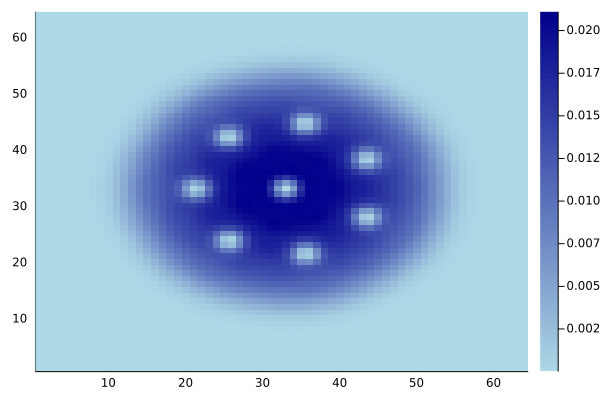

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)